In [15]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pymorphy3 import MorphAnalyzer

from IPython.display import Markdown, display

# Створення хмари символів

Для створення хмари символів треба:

1. Токенізувати текст.
2. Видалити стоп-слова та пунктуацію - фільтрація токенів [^1].
3. Лематизувами слова. Для цього використовується біліотека `pymorphy3` (для python 3.11). Для python 3.10 можна `pymorphy2`.
4. Знайти слова, що найчастіше зустрічаються в тексті за допомогою `nltk`.

[1]: Попередньо треба завантажити список стоп-слів. Приклад [тут](./Hw12_nltk.ipynb).

In [16]:
import os
import requests

# Перевіряємо наявність папки corpora/stopwords у каталозі nltk_data
nltk_data_path = nltk.data.path[0]
stopwords_path = os.path.join(nltk_data_path, "corpora", "stopwords")
if not os.path.exists(stopwords_path):
    os.makedirs(stopwords_path)


# Завантажуємо стоп-слова для української мови та зберігаємо у файл
url = "https://raw.githubusercontent.com/skupriienko/Ukrainian-Stopwords/master/stopwords_ua.txt"
r = requests.get(url)

with open(os.path.join(stopwords_path, "ukrainian"), "wb") as f:
    f.write(r.content)


stop_words = set(stopwords.words("ukrainian"))

# Текст, що аналізується

In [17]:
with open("text_ua.txt", "r", encoding="utf-8") as file:
    text = file.read()
display(Markdown(text))


Орбітальний корабель "Діскавері", OV-103, вважається таким, що має право на внесення до Національного реєстру історичних місць (NRHP) в контексті Програми космічних човників США (1969-2011) за Критерієм А в галузі космічних досліджень і транспорту та за Критерієм С в галузі інженерії. Оскільки вона досягла значущості протягом останніх п'ятдесяти років, застосовується Розгляд критерію G. Згідно з Критерієм А, "Діскавері" є важливим як найстаріший з трьох збережених орбітальних кораблів, побудованих для програми "Спейс Шаттл" (SSP), найдовшої американської космічної програми на сьогоднішній день; він був третім з п'яти орбітальних кораблів, побудованих НАСА. На відміну від програм "Меркурій", "Джеміні" та "Аполлон", основна увага в SSP приділялася економічній ефективності та багаторазовому використанню, а в перспективі - створенню космічної станції. Включаючи свій перший політ (запущений 30 серпня 1984 року), "Діскавері" здійснив тридцять дев'ять польотів у космос, більше, ніж будь-який з інших чотирьох орбітальних апаратів; він також став першим орбітальним апаратом, який здійснив двадцять місій. Вона мала честь бути обраною для повернення до польотів після аварій "Челленджера" і "Колумбії". "Діскавері" став першим шатлом, який здійснив політ з модернізованими SRB після аварії "Челленджера", і першим шатлом, який здійснив політ з SSME Фази II і Блоку I. "Діскавері" також доставив на орбіту космічний телескоп "Габбл" і здійснив дві з п'яти місій з обслуговування обсерваторії. Вона виконала першу і останню місії Міністерства оборони США, а також першу несекретну місію, пов'язану з обороною. Крім того, "Діскавері" відіграв важливу роль у будівництві Міжнародної космічної станції (МКС); він здійснив тринадцять з тридцяти семи польотів на станцію за допомогою американського космічного човника. Вона була першим орбітальним кораблем, який пристикувався до МКС, і першим, який здійснив обмін екіпажем, що проживає на станції. За критерієм С "Діскавері" є важливим як інженерний подвиг. За словами Вейна Хейла, керівника польотів Космічного центру імені Джонсона, орбітальний корабель "Спейс Шаттл" являє собою "величезний технологічний стрибок від одноразових ракет і капсул до багаторазового, крилатого, гіперзвукового, вантажного космічного корабля". Хоча його базова конструкція наслідує конструкцію звичайного літака, він використовує передові матеріали, які мінімізують його вагу для перевезення вантажу і мають низький коефіцієнт теплового розширення, що забезпечує стабільну основу для матеріалів системи теплового захисту (TPS). На орбітальному кораблі "Спейс Шаттл" також була встановлена перша багаторазова система TPS; всі попередні космічні кораблі мали одноразовий абляційний теплозахисний екран. Серед інших визначних інженерних досягнень орбітального корабля - перша багаторазова орбітальна рухова установка і перша стійка до двох відмов інтегрована система авіоніки. За словами Хейла, "Спейс Шаттл" залишається "найбільшим, найшвидшим, найкрилатішим гіперзвуковим літаком в історії", який регулярно літає зі швидкістю, що у двадцять п'ять разів перевищує швидкість звуку.

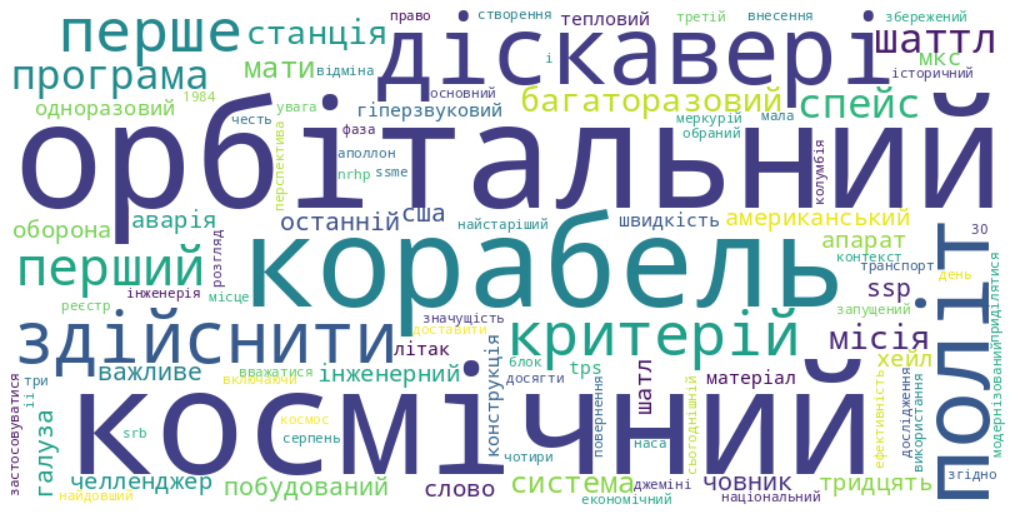

In [22]:
morph = MorphAnalyzer(lang="uk")

# Токенізація тексту
tokens = word_tokenize(text)

# Фільтрація токенів
filtered_tokens = [
    word.lower() for word in tokens if word.lower() not in stop_words and word.isalnum()
]


# Лематизація слів
lemmatized_tokens = [morph.parse(token)[0].normal_form for token in filtered_tokens]

freq_dist = FreqDist(lemmatized_tokens)

wordcloud = WordCloud(
    width=800, height=400, background_color="white", max_words=100, colormap="viridis"
).generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("space_shuttle.png")
plt.show()